# Dataset

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Ground Truth : 4')

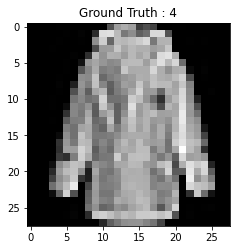

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

plt.figure(figsize=[8,8])
choice = 4738
plt.subplot(1,2,1)
plt.imshow(train_images[choice,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[choice]))

In [ ]:
import numpy as np

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
print(train_images.shape)
print(test_images.shape)
print('****************************************************')
train_images_2 = train_images - np.mean(train_images, axis = 0) # zero-center the data (important)
train_images_1 = train_images_2 / np.std(train_images, axis = 0)
test_images_2 = test_images -  np.mean(test_images, axis = 0)
test_images_1 = test_images_2 / np.std(test_images, axis = 0)


(60000, 784)
(10000, 784)
****************************************************


# Multilayer Perceptron (MLP)

In [ ]:
import math

def relu(X):
    return np.maximum(X, 0)

def dReLU(X):
    return 1 * (X > 0)

def leakyReLU(x):
  data = [max(0.05*value,value) for value in x]
  return np.array(data, dtype=float)

def dLeakyReLU(x):
  data = [1 if value>0 else 0.05 for value in x]
  return np.array(data, dtype=float)

def dtanh(x):
  return 1 - np.tanh(x) * np.tanh(x)

class ReLu():

  def __init__(self):
    pass

  def calculate(self, X):
    return np.maximum(X, 0)
  
  def derivative(self, X):
    return 1 * (X > 0)


class leakyReLu():
   def __init__(self, alpha):
    self.alpha = alpha 

   def calculate(self, X):
    return np.where(X > 0, X, X * 0.01)

   def derivative(self, X):
      dx = np.ones_like(X)
      dx[X < 0] = self.alpha
      return dx

class tanh():
   def __init__(self):
    pass

   def calculate(self, X):
     return np.tanh(X)

   def derivative(self, X):
    return 1 - np.tanh(X)**2

def softmax(X):
	e = np.exp(X)
	return e / e.sum()
 
def CrossEntropy(yh, y):
    m = y.shape[0]
    log_likelihood = -np.log(yh[range(m),y])
    loss = np.sum(log_likelihood) / m
    return loss

In [ ]:
import statistics
from math import sqrt
from numpy.random import randn
from statistics import mean
#https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
class Layer:

  def __init__(self, input_units, output_units, activation, learning_rate=0.1):
    self.learning_rate = learning_rate
    self.w = randn(input_units * output_units) * sqrt(2.0/input_units)
    self.w = self.w.reshape(input_units, output_units)
    print(self.w.shape)
    self.b = np.zeros(output_units)
    self.activation = activation

  def forwardPass(self, X):
    return np.dot(X, self.w) + self.b

  def backwardPass(self, loss, X):
    dz = np.outer(loss, self.w)
    dw = np.dot(X.T, loss)
    db = np.mean(dz, axis=0)

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

    return dz



In [ ]:
from scipy.special import softmax
import statistics
from math import sqrt
from numpy.random import randn
from statistics import mean
class OneLayer:

  def __init__(self, hidden_units, activation, learning_rate, keep_prob, dropout):
    self.hidden_units = hidden_units
    self.learning_rate = learning_rate
    self.activation = activation
    self.keep_prob = keep_prob
    self.dropout = dropout
    self.w1 = np.random.normal(size=(784, hidden_units), scale = sqrt(2.0/784))
    self.w2 = np.random.normal(size=(hidden_units, 10), scale = sqrt(2.0/hidden_units))
    self.b1 = np.zeros(hidden_units)
    self.b2 = np.zeros(10)

  def forwardPass(self, X):
    self.q = np.dot(X, self.w1)
    self.z = self.activation.calculate(self.q)

    if(self.dropout):
      self.d = np.random.rand(self.z.shape[0], self.z.shape[1])
      self.d = self.d < self.keep_prob
      self.z = (self.z * self.d)/self.keep_prob
    self.u = np.dot(self.z, self.w2)
    self.yh = softmax(self.u, 1)
    return self.yh
  
  def backwardPass(self, X, loss):
    m = int(X.shape[0])
    dw2 = np.dot(self.z.T, loss)/m
    db2 = np.sum(loss, axis=0)/m
    dq = np.dot(loss, self.w2.T) * self.activation.derivative(self.q)

    dw1 = np.dot(X.T, dq)/m
    db1 = np.sum(dq, axis=0)/m

    self.w1 = self.w1 - self.learning_rate * dw1
    self.w2 = self.w2 - self.learning_rate * dw2
    self.b1 = self.b1 - self.learning_rate * db1
    self.b2 = self.b2 - self.learning_rate * db2




    

In [ ]:
class TwoLayers:
  def __init__(self, hidden_units, activation, learning_rate, keep_prob, dropout):
    self.hidden_units = hidden_units
    self.learning_rate = learning_rate
    self.activation = activation
    self.keep_prob = keep_prob
    self.dropout = dropout
    self.w1 = np.random.normal(size=(784, hidden_units), scale = sqrt(2.0/784))
    self.w2 = np.random.normal(size=(hidden_units, hidden_units), scale = sqrt(2.0/hidden_units))
    self.w3 = np.random.normal(size=(hidden_units, 10), scale = sqrt(2.0/hidden_units))
    self.b1 = np.zeros(hidden_units)
    self.b2 = np.zeros(hidden_units)
    self.b3 = np.zeros(10)


  def forwardPass(self, X):
    self.q = np.dot(X, self.w1)
    self.z = self.activation.calculate(self.q)
    if(self.dropout):
      self.d1 = np.random.rand(self.z.shape[0], self.z.shape[1])
      self.d1 = self.d1 < self.keep_prob
      self.z = (self.z * self.d1)/self.keep_prob

    self.u = np.dot(self.z, self.w2)
    self.l = self.activation.calculate(self.u)
    if(self.dropout):
      self.d2 = np.random.rand(self.l.shape[0], self.l.shape[1])
      self.d2 = self.d2 < self.keep_prob
      self.l = (self.l * self.d2)/self.keep_prob

    self.p = np.dot(self.l, self.w3)
    self.yh = softmax(self.p, 1)
    return self.yh
  
  def backwardPass(self, X, loss):
    m = int(X.shape[0])
    dw3 = np.dot(self.l.T, loss)/m
    db3 = np.sum(loss, axis=0)/m
    du = np.dot(loss, self.w3.T) * self.activation.derivative(self.u)

    dw2 = np.dot(self.z.T, du)/m
    db2 = np.sum(du, axis=0)/m
    dq = np.dot(du, self.w2.T) * self.activation.derivative(self.q)

    dw1 = np.dot(X.T, dq)/m
    db1 = np.sum(dq, axis=0)/m

    self.w1 = self.w1 - self.learning_rate * dw1
    self.w2 = self.w2 - self.learning_rate * dw2
    self.w3 = self.w3 - self.learning_rate * dw3
    self.b1 = self.b1 - self.learning_rate * db1
    self.b2 = self.b2 - self.learning_rate * db2
    self.b3 = self.b3 - self.learning_rate * db3

In [ ]:
class NoLayer:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.w1 = np.random.normal(size=(784, 10), scale = sqrt(2.0/784))
    self.b1 = np.zeros(10)

  def forwardPass(self, X):
    self.q = np.dot(X, self.w1)
    self.yh = softmax(self.q, 1)
    return self.yh

  def backwardPass(self, X, loss):
    m = int(X.shape[0])
    dw1 = np.dot(X.T, loss)/m
    db1 = np.sum(loss, axis=0)/m

    self.w1 = self.w1 - self.learning_rate * dw1
    self.b1 = self.b1 - self.learning_rate * db1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

class MLP:
    
    def __init__(self, activation, numUnits = 128, hiddenLayers = 1, learning_rate=0.0001, keep_prob=1, dropout=0):
      if(hiddenLayers == 0):
        self.network = NoLayer(learning_rate)
      elif(hiddenLayers == 1):
        self.network = OneLayer(numUnits, activation, learning_rate, keep_prob, dropout)
      elif(hiddenLayers == 2):
        self.network = TwoLayers(numUnits, activation, learning_rate, keep_prob, dropout)


      
    def fit(self, epoch, batch_size, x, y):
      for l in range(epoch):
        for i in range(int(len(x)/batch_size)):
          #Get minibatch of size batch_size
          index = i*batch_size
          data = x[index:index + batch_size, :]
          #validation = OneHotEncoder(sparse=False).fit_transform(y[index:index + batch_size].reshape(batch_size, 1))
          validation = tf.one_hot(y[index:index + batch_size], 10)
          #print(validation)
          #Start gradient descent
          yh = self.network.forwardPass(data)
          loss = yh - validation
          self.network.backwardPass(data, loss)

        y_prob = self.predict(x)
        y_pred = np.argmax(y_prob, 1)
        accuracy = np.sum(y_pred == y)/y_pred.shape[0]
        #print(f'test accuracy for epoch {l}: {accuracy}')
          
      return self
    
    def predict(self, x):
      yh = self.network.forwardPass(x)
      return yh

**3.1) 0 hidden layer vs 1 hidden layer vs 2 hidden layer**

In [ ]:
np.random.seed(10)
zeroLayer = MLP(ReLu(), 128, 0,  0.01)
zeroLayer.fit(35, 128, train_images_1, train_labels)
y_prob_zeroLayer = zeroLayer.predict(test_images_1)
y_pred_zeroLayer = np.argmax(y_prob_zeroLayer, 1)
accuracy_zeroLayer = np.sum(y_pred_zeroLayer == test_labels)/y_pred_zeroLayer.shape[0]
print("Accuracy for Zero Layer", accuracy_zeroLayer)

Accuracy for Zero Layer 0.8428


In [ ]:
np.random.seed(10)
oneLayer = MLP(ReLu(), 128, 1, 0.01)
oneLayer.fit(35, 128, train_images_1, train_labels)
y_prob_oneLayer = oneLayer.predict(test_images_1)
y_pred_oneLayer = np.argmax(y_prob_oneLayer, 1)
accuracy_oneLayer = np.sum(y_pred_oneLayer == test_labels)/y_pred_oneLayer.shape[0]
print("Accuracy for One Layer", accuracy_oneLayer)


Accuracy for One Layer 0.8788


In [ ]:
np.random.seed(10)
twoLayer = MLP(ReLu(), 128, 2, 0.01)
twoLayer.fit(35, 128, train_images_1, train_labels)
y_prob_twoLayer = twoLayer.predict(test_images_1)
y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
accuracy_twoLayer = np.sum(y_pred_twoLayer == test_labels)/y_pred_twoLayer.shape[0]
print("Accuracy for Two Layer", accuracy_twoLayer)

Accuracy for Two Layer 0.8781


Text(0, 0.5, 'Accuracy')

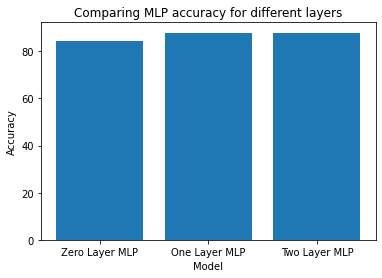

In [ ]:
accuracies = [accuracy_zeroLayer, accuracy_oneLayer, accuracy_twoLayer]
models = ['Zero Layer MLP', 'One Layer MLP', 'Two Layer MLP']
plt.bar(models, [i * 100 for i in accuracies])
plt.title('Comparing MLP accuracy for different layers')
plt.xlabel('Model')
plt.ylabel('Accuracy')


**3.2) comparing with tanh and Leaky-ReLU**

In [ ]:
np.random.seed(10)
twoLayerLeakyReLu = MLP(leakyReLu(0.01), 128, 2, 0.01)
twoLayerLeakyReLu.fit(35, 128, train_images_1, train_labels)
y_prob_twoLayerLeakyReLu = twoLayerLeakyReLu.predict(test_images_1)
y_pred_twoLayerLeakyReLu = np.argmax(y_prob_twoLayerLeakyReLu, 1)
accuracy_twoLayerLeakyReLu = np.sum(y_pred_twoLayerLeakyReLu == test_labels)/y_pred_twoLayerLeakyReLu.shape[0]
print("Accuracy for leakyReLu", accuracy_twoLayerLeakyReLu)

Accuracy for leakyReLu 0.8778


In [ ]:
np.random.seed(10)
twoLayertanH = MLP(tanh(), 128, 2, 0.01)
twoLayertanH.fit(35, 128, train_images_1, train_labels)
y_prob_twoLayertanH = twoLayertanH.predict(test_images_1)
y_pred_twoLayertanH = np.argmax(y_prob_twoLayertanH, 1)
accuracy_twoLayertanH = np.sum(y_pred_twoLayertanH == test_labels)/y_pred_twoLayertanH.shape[0]
print("Accuracy for tanh", accuracy_twoLayertanH)


Accuracy for tanh 0.8748


Text(0, 0.5, 'Accuracy')

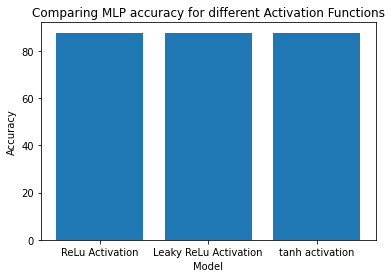

In [ ]:
activationAccuracies = [accuracy_twoLayer, accuracy_twoLayerLeakyReLu, accuracy_twoLayertanH]
models = ['ReLu Activation', 'Leaky ReLu Activation', 'tanh activation']
plt.bar(models, [i * 100 for i in activationAccuracies])
plt.title('Comparing MLP accuracy for different Activation Functions')
plt.xlabel('Model')
plt.ylabel('Accuracy')

**3.3) with drop out**

In [ ]:
dropOutAccuracies = []
for i in range(4):
  np.random.seed(10)
  twoLayer = MLP(ReLu(), 128, 2, 0.01, .9-(i)*.1, 1)
  twoLayer.fit(20, 128, train_images_1, train_labels)
  y_prob_twoLayer = twoLayer.predict(test_images_1)
  y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
  best_accuracy_twoLayer_dropOut = np.sum(y_pred_twoLayer == test_labels)/y_pred_twoLayer.shape[0]
  dropOutAccuracies.append(best_accuracy_twoLayer_dropOut)

print(dropOutAccuracies)

[0.8507, 0.8211, 0.7796, 0.7339]


Optimal Learning Rate:  90


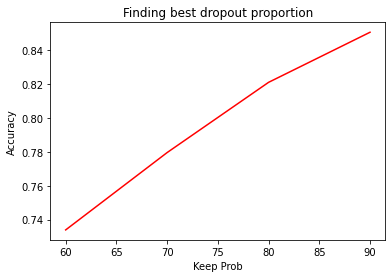

In [ ]:
maxVal = max(dropOutAccuracies)
index = dropOutAccuracies.index(maxVal)
optimalDropOut = 90-(index)*20
print("Optimal Learning Rate: ", optimalDropOut)
accuraciesOfalphas = [i * 100 for i in dropOutAccuracies]
plt.title("Finding best dropout proportion")
plt.xlabel("Keep Prob")
plt.ylabel("Accuracy")
plt.plot([90, 80, 70, 60], dropOutAccuracies, color ="red")

**3.4) train with unnormalized images**

In [ ]:
np.random.seed(10)
twoLayer = MLP(ReLu(), 128, 2)
twoLayer.fit(35, 128, train_images, train_labels)
y_prob_twoLayer_unNormalized = twoLayer.predict(test_images)
y_pred_twoLayer_unNormalized = np.argmax(y_prob_twoLayer_unNormalized, 1)
accuracy_twoLayer_unNormalized = np.sum(y_pred_twoLayer_unNormalized == test_labels)/y_pred_twoLayer_unNormalized.shape[0]
print("Accuracy for Two Layer with unNormalized Images", accuracy_twoLayer_unNormalized)

Accuracy for Two Layer with unNormalized Images 0.8056


Text(0, 0.5, 'Accuracy')

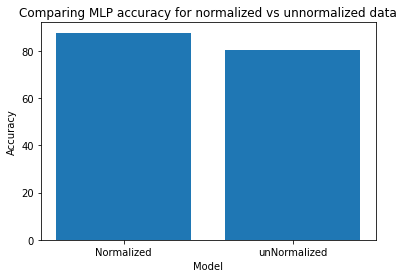

In [ ]:
normAccuracies = [accuracy_twoLayer, accuracy_twoLayer_unNormalized]
models = ['Normalized', 'unNormalized']
plt.bar(models, [i * 100 for i in normAccuracies])
plt.title('Comparing MLP accuracy for normalized vs unnormalized data')
plt.xlabel('Model')
plt.ylabel('Accuracy')

**3.6) tuning for optimal alpha, epochs, and batch size**

In [ ]:
#tuning alpha
accuracies_array = []
for i in range(8):
  np.random.seed(10)
  twoLayer = MLP(ReLu(), 128, 2, 0.001*5*(i+1))
  twoLayer.fit(35, 128, train_images_1, train_labels)
  y_prob_twoLayer = twoLayer.predict(test_images_1)
  y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
  accuracy_twoLayer = np.sum(y_pred_twoLayer == test_labels)/y_pred_twoLayer.shape[0]
  accuracies_array.append(accuracy_twoLayer)

print(accuracies_array)


[0.8731, 0.8781, 0.8791, 0.8802, 0.8786, 0.8781, 0.8794, 0.8781]


Optimal Learning Rate:  0.02


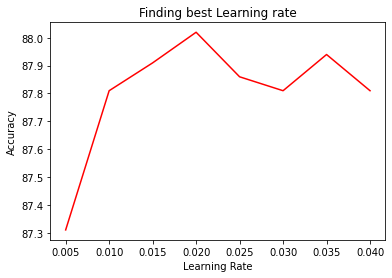

In [ ]:
maxVal = max(accuracies_array)
index = accuracies_array.index(maxVal)
optimalLearningRate = (index+1)*0.001*5
print("Optimal Learning Rate: ", optimalLearningRate)
accuraciesOfalphas = [i * 100 for i in accuracies_array]
plt.title("Finding best Learning rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.plot([0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04], accuraciesOfalphas, color ="red")


In [ ]:
#tuning batch size
accuracies_array_diffBatch = []
for i in range(5):
  np.random.seed(10)
  twoLayer = MLP(ReLu(), 128, 2, 0.02)
  batchSize = pow(2, (i+4))
  twoLayer.fit(35, batchSize, train_images_1, train_labels)
  y_prob_twoLayer = twoLayer.predict(test_images_1)
  y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
  accuracy_twoLayer = np.sum(y_pred_twoLayer == test_labels)/y_pred_twoLayer.shape[0]
  accuracies_array_diffBatch.append(accuracy_twoLayer)

print(accuracies_array_diffBatch)

[0.8705, 0.8791, 0.8803, 0.8802, 0.8776]


Optimal Batch Size:  64


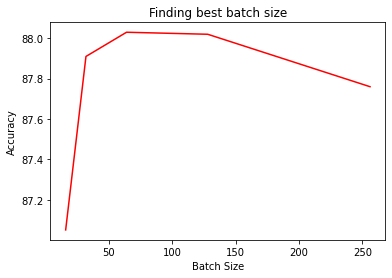

In [ ]:
maxVal = max(accuracies_array_diffBatch)
index = accuracies_array_diffBatch.index(maxVal)
optimalBatchSize = pow(2, (index+4))
print("Optimal Batch Size: ", optimalBatchSize)
accuraciesOfbatches = [i * 100 for i in accuracies_array_diffBatch]
plt.title("Finding best batch size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.plot([16, 32, 64, 128, 256], accuraciesOfbatches, color ="red")

In [ ]:
#tuning epochs and checking for overfitting

#test data
accuracies_test_diffEpochs = []
for i in range(5):
  np.random.seed(10)
  twoLayer = MLP(ReLu(), 128, 2, 0.02)
  twoLayer.fit((i+1)*10, 64, train_images_1, train_labels)
  y_prob_twoLayer = twoLayer.predict(test_images_1)
  y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
  accuracy_twoLayer = np.sum(y_pred_twoLayer == test_labels)/y_pred_twoLayer.shape[0]
  accuracies_test_diffEpochs.append(accuracy_twoLayer)

print(accuracies_test_diffEpochs)

[0.8749, 0.881, 0.8802, 0.878, 0.8769]


In [ ]:
#tuning epochs and checking for overfitting

#training data
accuracies_train_diffEpochs = []
for i in range(5):
  np.random.seed(10)
  twoLayer = MLP(ReLu(), 128, 2, 0.02)
  twoLayer.fit((i+1)*10, 64, train_images_1, train_labels)
  y_prob_twoLayer = twoLayer.predict(train_images_1)
  y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
  accuracy_twoLayer = np.sum(y_pred_twoLayer == train_labels)/y_pred_twoLayer.shape[0]
  accuracies_train_diffEpochs.append(accuracy_twoLayer)

print(accuracies_train_diffEpochs)

[0.9199333333333334, 0.94345, 0.95995, 0.9692, 0.9761333333333333]


Best epoch for accuracy which doesn't incurr overfitting:  20


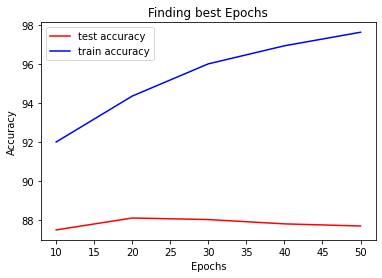

In [ ]:
accuraciesOfEpochsTest = [i * 100 for i in accuracies_test_diffEpochs]
accuraciesOfEpochsTrain = [i * 100 for i in accuracies_train_diffEpochs]

listOfDiff = [x1 - x2 for (x1, x2) in zip(accuraciesOfEpochsTrain, accuraciesOfEpochsTest)]
diff = []
for idx in range(0, len(listOfDiff)) :
    if listOfDiff[idx] < 6.5:
        diff.append(idx)

accNotOverfit = []
for i in range(len(accuraciesOfEpochsTest)):
  if i in diff:
    accNotOverfit.append(accuraciesOfEpochsTest[i])

tmp = max(accNotOverfit)
ind = accNotOverfit.index(tmp)

index = diff[ind]

print("Best epoch for accuracy which doesn't incurr overfitting: ", (index+1)*10)

plt.title("Finding best Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot([10, 20, 30, 40, 50], accuraciesOfEpochsTest, color ="red", label='test accuracy')
plt.legend(loc='best')
plt.plot([10, 20, 30, 40, 50], accuraciesOfEpochsTrain, color ="blue", label='train accuracy')
plt.legend(loc='best')

**Best MLP architecture**

In [38]:
np.random.seed(10)
twoLayer = MLP(ReLu(), 128, 2, 0.01, 0.9, 1)
twoLayer.fit(20, 64, train_images_1, train_labels)
y_prob_twoLayer = twoLayer.predict(test_images_1)
y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
best_accuracy_twoLayer = np.sum(y_pred_twoLayer == test_labels)/y_pred_twoLayer.shape[0]
print(best_accuracy_twoLayer)

0.8576


In [ ]:
np.random.seed(10)
twoLayer = MLP(ReLu(), 128, 2, 0.02)
twoLayer.fit(20, 64, train_images_1, train_labels)
y_prob_twoLayer = twoLayer.predict(test_images_1)
y_pred_twoLayer = np.argmax(y_prob_twoLayer, 1)
best_accuracy_twoLayer = np.sum(y_pred_twoLayer == test_labels)/y_pred_twoLayer.shape[0]
print(best_accuracy_twoLayer)

0.881


# Convolutional Neural Network (CNN)

First Model

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters=32, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu', 
        input_shape=(28, 28, 1) 
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)

model.add(
    tf.keras.layers.Conv2D(
        filters=64, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu'
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)

model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=10, 
        activation='softmax'
    )
)


model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

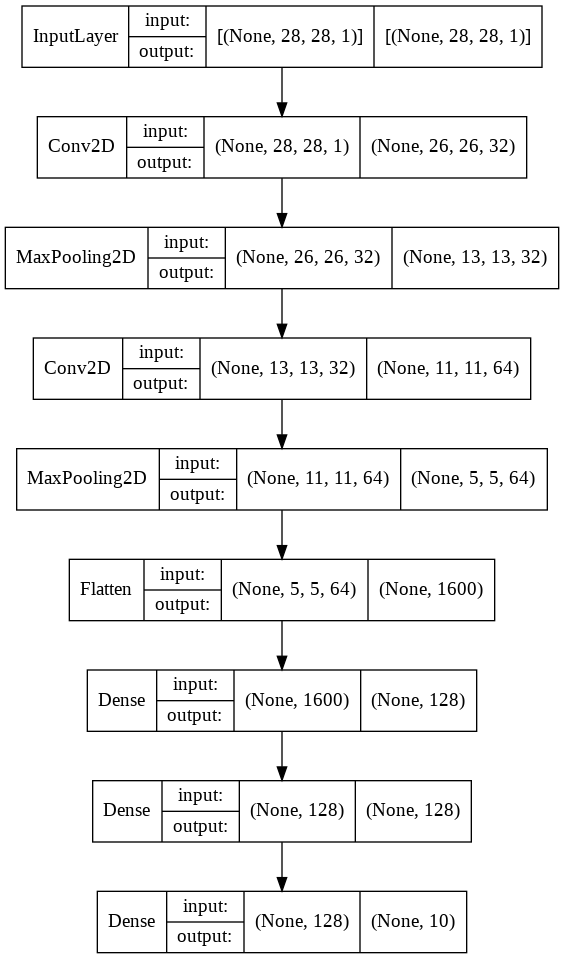

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
x_train = np.expand_dims(train_images, -1)
x_test = np.expand_dims(test_images, -1)
history = model.fit(
      x_train, train_labels,
      batch_size=128, 
      epochs=50, 
      validation_split=0.2, 
      verbose=1) 

Epoch 1/50
375/375 [==============================] - 40s 105ms/step - loss: 0.5986 - accuracy: 0.7825 - val_loss: 0.4110 - val_accuracy: 0.8547
Epoch 2/50
375/375 [==============================] - 40s 106ms/step - loss: 0.3677 - accuracy: 0.8664 - val_loss: 0.3524 - val_accuracy: 0.8693
Epoch 3/50
375/375 [==============================] - 41s 109ms/step - loss: 0.3104 - accuracy: 0.8863 - val_loss: 0.3235 - val_accuracy: 0.8788
Epoch 4/50
375/375 [==============================] - 40s 106ms/step - loss: 0.2760 - accuracy: 0.8992 - val_loss: 0.2841 - val_accuracy: 0.8966
Epoch 5/50
375/375 [==============================] - 39s 104ms/step - loss: 0.2494 - accuracy: 0.9075 - val_loss: 0.2867 - val_accuracy: 0.8967
Epoch 6/50
375/375 [==============================] - 39s 104ms/step - loss: 0.2350 - accuracy: 0.9132 - val_loss: 0.2824 - val_accuracy: 0.8945
Epoch 7/50
375/375 [==============================] - 39s 104ms/step - loss: 0.2133 - accuracy: 0.9214 - val_loss: 0.2557 - val_ac

313/313 - 2s - loss: 0.7176 - accuracy: 0.9095 - 2s/epoch - 7ms/step


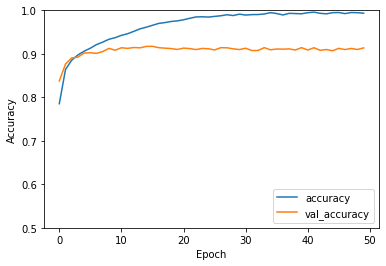

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

print(classification_report(test_labels, classes_x, target_names=label_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.86      0.86      1000
       Dress       0.91      0.94      0.92      1000
        Coat       0.86      0.86      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Model with increasing kernel size

In [ ]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters=32, 
        kernel_size=(5, 5), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu', 
        input_shape=(28, 28, 1) 
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)

model.add(
    tf.keras.layers.Conv2D(
        filters=64, 
        kernel_size=(5, 5), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu'
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(3, 3), 
        strides=(2, 2) 
    )
)

model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=10, 
        activation='softmax'
    )
)


model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'] 
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

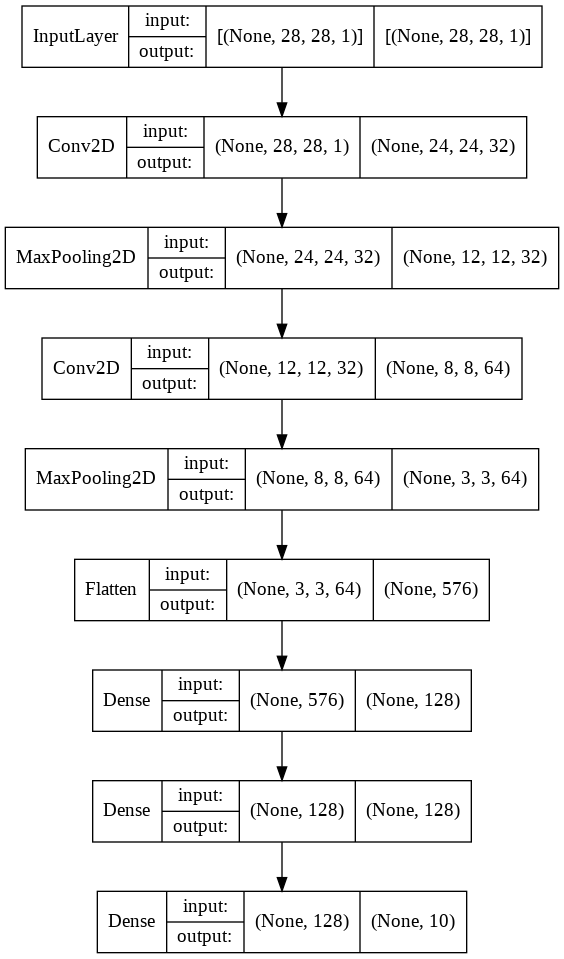

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
x_train = np.expand_dims(train_images, -1)
x_test = np.expand_dims(test_images, -1)
history = model.fit(
      x_train, train_labels,
      batch_size=128, 
      epochs=50, 
      validation_split=0.2, 
      verbose=1) 

Epoch 1/50
375/375 [==============================] - 43s 112ms/step - loss: 0.6805 - accuracy: 0.7511 - val_loss: 0.4975 - val_accuracy: 0.8197
Epoch 2/50
375/375 [==============================] - 42s 113ms/step - loss: 0.4229 - accuracy: 0.8468 - val_loss: 0.3871 - val_accuracy: 0.8634
Epoch 3/50
375/375 [==============================] - 42s 112ms/step - loss: 0.3587 - accuracy: 0.8707 - val_loss: 0.3836 - val_accuracy: 0.8618
Epoch 4/50
375/375 [==============================] - 42s 113ms/step - loss: 0.3207 - accuracy: 0.8835 - val_loss: 0.3426 - val_accuracy: 0.8811
Epoch 5/50
375/375 [==============================] - 42s 112ms/step - loss: 0.2928 - accuracy: 0.8911 - val_loss: 0.3269 - val_accuracy: 0.8786
Epoch 6/50
375/375 [==============================] - 42s 112ms/step - loss: 0.2700 - accuracy: 0.8996 - val_loss: 0.3195 - val_accuracy: 0.8832
Epoch 7/50
375/375 [==============================] - 42s 112ms/step - loss: 0.2519 - accuracy: 0.9067 - val_loss: 0.2954 - val_ac

313/313 - 2s - loss: 0.7663 - accuracy: 0.8927 - 2s/epoch - 8ms/step


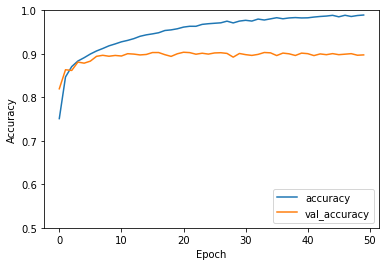

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Model with adding dropout layers 

In [ ]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters=32, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu', 
        input_shape=(28, 28, 1) 
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)

model.add(tf.keras.layers.Dropout(0.25))

model.add(
    tf.keras.layers.Conv2D(
        filters=64, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu'
    )
) 

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), 
        strides=(2, 2) 
    )
)
model.add(tf.keras.layers.Dropout(0.4))
model.add(
    tf.keras.layers.Flatten()
)

model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)

model.add(
    tf.keras.layers.Dense(
        units=128, 
        activation='relu' 
    )
)
model.add(tf.keras.layers.Dropout(0.3))
model.add(
    tf.keras.layers.Dense(
        units=10, 
        activation='softmax'
    )
)


model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

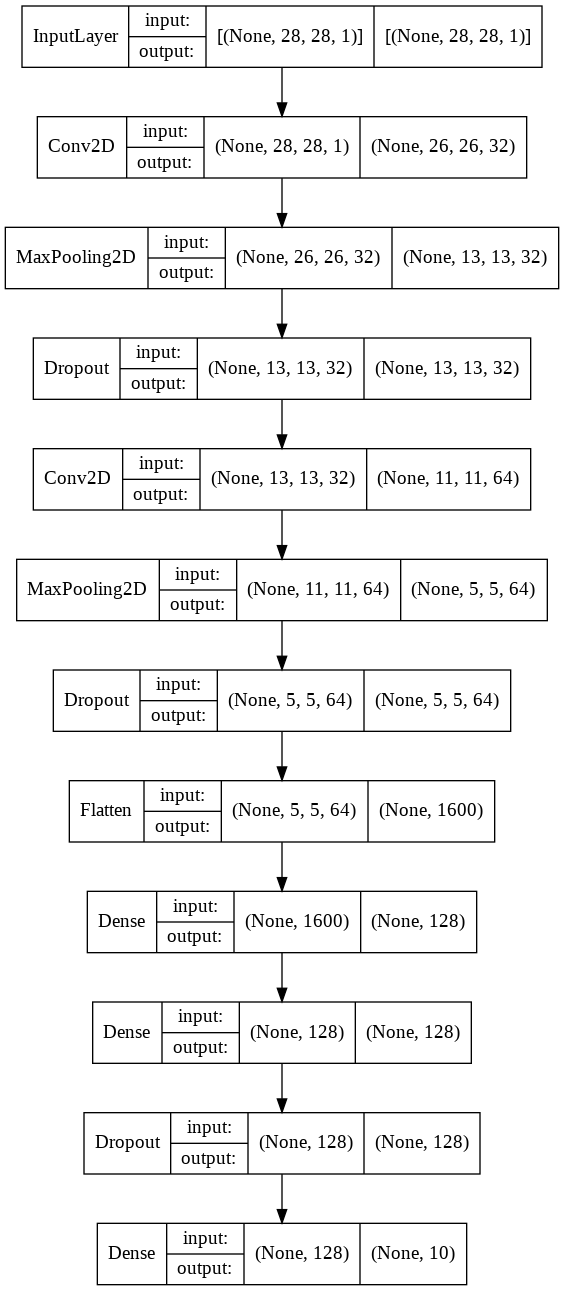

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
x_train = np.expand_dims(train_images, -1)
x_test = np.expand_dims(test_images, -1)
history = model.fit(
      x_train, train_labels,
      batch_size=128, 
      epochs=50, 
      validation_split=0.2, 
      verbose=1) 

Epoch 1/50
375/375 [==============================] - 44s 116ms/step - loss: 0.7261 - accuracy: 0.7297 - val_loss: 0.4444 - val_accuracy: 0.8430
Epoch 2/50
375/375 [==============================] - 40s 107ms/step - loss: 0.4591 - accuracy: 0.8316 - val_loss: 0.3831 - val_accuracy: 0.8562
Epoch 3/50
375/375 [==============================] - 38s 102ms/step - loss: 0.3976 - accuracy: 0.8556 - val_loss: 0.3299 - val_accuracy: 0.8781
Epoch 4/50
375/375 [==============================] - 42s 113ms/step - loss: 0.3662 - accuracy: 0.8665 - val_loss: 0.3182 - val_accuracy: 0.8834
Epoch 5/50
375/375 [==============================] - 38s 101ms/step - loss: 0.3396 - accuracy: 0.8748 - val_loss: 0.2905 - val_accuracy: 0.8892
Epoch 6/50
375/375 [==============================] - 38s 102ms/step - loss: 0.3169 - accuracy: 0.8836 - val_loss: 0.2836 - val_accuracy: 0.8963
Epoch 7/50
375/375 [==============================] - 38s 100ms/step - loss: 0.3016 - accuracy: 0.8904 - val_loss: 0.2719 - val_ac

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

NameError: ignored

**3.7) Comparing optimal MLP to CNN**

In [ ]:
print(test_acc)
MLPandCnnAccuracies = [best_accuracy_twoLayer, 0.9459]
models = ['MLP', 'CNN']
plt.bar(models, [i * 100 for i in MLPandCnnAccuracies])
plt.title('Accuracy for MLP vs CNN on fashion mnist data')
plt.xlabel('Model')
plt.ylabel('Accuracy')

NameError: ignored